### Problem 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import string
import nltk
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('inaugural')
import re
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vinyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vinyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Vinyas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


In [2]:
inaugural.fileids()[:10]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt']

In [3]:
len(inaugural.fileids())

59

In [4]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [5]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [6]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

### 2.1 Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts

In [7]:
nltk.FreqDist(inaugural.raw('1941-Roosevelt.txt'))

FreqDist({' ': 1322, 'e': 782, 't': 606, 'o': 456, 'i': 447, 'a': 424, 'n': 420, 's': 368, 'r': 343, 'h': 312, ...})

In [8]:
nltk.FreqDist(inaugural.raw('1961-Kennedy.txt'))

FreqDist({' ': 1363, 'e': 767, 't': 540, 'o': 527, 'a': 423, 'n': 415, 'r': 408, 's': 368, 'i': 355, 'h': 301, ...})

In [9]:
nltk.FreqDist(inaugural.raw('1973-Nixon.txt'))

FreqDist({' ': 1768, 'e': 1051, 't': 715, 'o': 657, 'a': 592, 'r': 556, 'n': 529, 'i': 518, 's': 482, 'h': 394, ...})

In [10]:
len(inaugural.raw('1941-Roosevelt.txt'))

7571

In [11]:
len(inaugural.raw('1961-Kennedy.txt'))

7618

In [12]:
len(inaugural.raw('1973-Nixon.txt'))

9991

#### The length of words in these speeches

In [13]:
len(inaugural.words('1941-Roosevelt.txt'))

1536

In [14]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [15]:
len(inaugural.words('1973-Nixon.txt'))

2028

#### The length of sentences in these speeches

In [16]:
len(inaugural.sents('1941-Roosevelt.txt'))

68

In [17]:
len(inaugural.sents('1961-Kennedy.txt'))

52

In [18]:
len(inaugural.sents('1973-Nixon.txt'))

69

In [19]:
inaugural.words()

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

#### The Frequency of Top 10 characters and words in these speeches

In [69]:
nltk.FreqDist(inaugural.words('1941-Roosevelt.txt')).most_common(10)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24)]

In [70]:
nltk.FreqDist(inaugural.words('1961-Kennedy.txt')).most_common(10)

[(',', 85),
 ('the', 83),
 ('of', 65),
 ('.', 51),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24)]

In [71]:
nltk.FreqDist(inaugural.words('1973-Nixon.txt')).most_common(10)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32)]

In [20]:
inaugural.raw()

'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not

In [21]:
inaugural.sents()

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [22]:
inaugural.paras()

[[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':']], [['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ['On', 'the', 'one', 'hand', ',', 'I', 'was', 'summoned', 'by', 'my', 'Country', ',', 'whose', 'voice', 'I', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'I', 'had', 'chosen', 'with', 'the', 'fondest', 'predilection', ',', 'and', ',', 'in', 'my', 'flattering', 'hopes', ',', 'with', 'an', 'immutable', 'decision', ',', 'as', 'the', 'asylum', 'of', 'my', 'declining', 'years', '--', 'a', 'retreat', 'which', 'was', 'rendered', 'every', 'day', 'more', 'necessary', 'as', 'well', 'as', 'more', 'dea

In [23]:
nltk.FreqDist(inaugural.words())

FreqDist({'the': 9555, ',': 7275, 'of': 7169, 'and': 5226, '.': 5011, 'to': 4477, 'in': 2604, 'a': 2229, 'our': 2062, 'that': 1769, ...})

In [24]:
nltk.FreqDist(inaugural.words()).most_common(10)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769)]

### 2.2 Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [25]:
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
nltk.FreqDist(inaugural.words('1941-Roosevelt.txt')).most_common(10)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24)]

In [72]:
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)

all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features_roosevelt = [item[0] for item in all_words_freq.most_common(10000)]

In [73]:
len(word_features_roosevelt)

425

In [29]:
word_features_roosevelt

['--',
 'nation',
 'know',
 'spirit',
 'life',
 'democracy',
 'us',
 'people',
 'america',
 'years',
 'freedom',
 'human',
 'men',
 'new',
 'body',
 'mind',
 'speaks',
 'day',
 'states',
 'government',
 'must',
 'something',
 'faith',
 'united',
 'task',
 'within',
 'history',
 'nations',
 'three',
 'live',
 'future',
 'free',
 'alone',
 'still',
 'every',
 'continent',
 'like',
 'person',
 'world',
 'sacred',
 'came',
 'first',
 'destiny',
 'national',
 '1789',
 'sense',
 'washington',
 'create',
 'together',
 'disruption',
 'without',
 'come',
 'time',
 'midst',
 'stock',
 'may',
 'lives',
 'little',
 'measure',
 'doubt',
 'measured',
 'americans',
 'true',
 'republic',
 'acted',
 'security',
 'things',
 'present',
 'many',
 'built',
 'maintained',
 'constitution',
 'freely',
 'american',
 'seen',
 'cannot',
 'enterprise',
 'forms',
 'hopes',
 'find',
 'even',
 'upon',
 'early',
 'peoples',
 'written',
 'land',
 'could',
 'forward',
 'go',
 'enough',
 'would',
 'seem',
 'old',
 'word

In [30]:
nltk.FreqDist(inaugural.words('1961-Kennedy.txt')).most_common(10)

[(',', 85),
 ('the', 83),
 ('of', 65),
 ('.', 51),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24)]

In [31]:
nltk.FreqDist(word_features_roosevelt).most_common(100)

[('--', 1),
 ('nation', 1),
 ('know', 1),
 ('spirit', 1),
 ('life', 1),
 ('democracy', 1),
 ('us', 1),
 ('people', 1),
 ('america', 1),
 ('years', 1),
 ('freedom', 1),
 ('human', 1),
 ('men', 1),
 ('new', 1),
 ('body', 1),
 ('mind', 1),
 ('speaks', 1),
 ('day', 1),
 ('states', 1),
 ('government', 1),
 ('must', 1),
 ('something', 1),
 ('faith', 1),
 ('united', 1),
 ('task', 1),
 ('within', 1),
 ('history', 1),
 ('nations', 1),
 ('three', 1),
 ('live', 1),
 ('future', 1),
 ('free', 1),
 ('alone', 1),
 ('still', 1),
 ('every', 1),
 ('continent', 1),
 ('like', 1),
 ('person', 1),
 ('world', 1),
 ('sacred', 1),
 ('came', 1),
 ('first', 1),
 ('destiny', 1),
 ('national', 1),
 ('1789', 1),
 ('sense', 1),
 ('washington', 1),
 ('create', 1),
 ('together', 1),
 ('disruption', 1),
 ('without', 1),
 ('come', 1),
 ('time', 1),
 ('midst', 1),
 ('stock', 1),
 ('may', 1),
 ('lives', 1),
 ('little', 1),
 ('measure', 1),
 ('doubt', 1),
 ('measured', 1),
 ('americans', 1),
 ('true', 1),
 ('republic', 1),

In [32]:
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)

all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features_kennedy = [item[0] for item in all_words_freq.most_common(2000)]

In [33]:
len(word_features_kennedy)

457

In [78]:
word_features_kennedy

['--',
 'let',
 'us',
 'world',
 'sides',
 'new',
 'pledge',
 'citizens',
 'power',
 'shall',
 'free',
 'nations',
 'ask',
 'president',
 'fellow',
 'freedom',
 'man',
 'first',
 'americans',
 'war',
 'peace',
 'always',
 'cannot',
 'hope',
 'help',
 'arms',
 'country',
 'call',
 'today',
 'well',
 'god',
 'human',
 'poverty',
 'life',
 'globe',
 'dare',
 'go',
 'generation',
 'know',
 'bear',
 'control',
 'may',
 'good',
 'join',
 'begin',
 'never',
 'final',
 'vice',
 'mr',
 'forebears',
 'century',
 'hands',
 'forms',
 'yet',
 'around',
 'rights',
 'hand',
 'revolution',
 'word',
 'forth',
 'time',
 'friend',
 'foe',
 'passed',
 'nation',
 'committed',
 'every',
 'whether',
 'burden',
 'meet',
 'support',
 'oppose',
 'assure',
 'success',
 'loyalty',
 'united',
 'little',
 'powerful',
 'states',
 'welcome',
 'merely',
 'far',
 'tyranny',
 'find',
 'supporting',
 'back',
 'best',
 'seek',
 'south',
 'offer',
 'deeds',
 'alliance',
 'powers',
 'instruments',
 'weak',
 'finally',
 'wou

In [35]:
nltk.FreqDist(inaugural.words('1973-Nixon.txt')).most_common(10)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32)]

In [36]:
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)

all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

all_words_freq = nltk.FreqDist(all_words_clean)

word_features_nixon = [item[0] for item in all_words_freq.most_common(2000)]

In [37]:
len(word_features_nixon)

419

In [38]:
word_features_nixon

['us',
 'let',
 'america',
 'peace',
 'world',
 '--',
 'new',
 'nation',
 'responsibility',
 'government',
 'great',
 'home',
 'abroad',
 'together',
 'years',
 'shall',
 'policies',
 'role',
 'make',
 'every',
 'history',
 'better',
 'time',
 'right',
 'people',
 'help',
 'four',
 'today',
 'era',
 'responsibilities',
 'progress',
 'come',
 'respect',
 'others',
 'act',
 'one',
 'promise',
 'long',
 'work',
 'freedom',
 'god',
 'old',
 'proud',
 'faith',
 'mr',
 'country',
 'share',
 'war',
 'resolve',
 'retreat',
 'greatly',
 'century',
 'nations',
 'bold',
 'end',
 'another',
 'future',
 'forward',
 'build',
 'structure',
 'live',
 'system',
 'gladly',
 'challenges',
 'away',
 'way',
 'individual',
 'ask',
 'ashamed',
 'think',
 'spirit',
 'conflict',
 'meet',
 'stand',
 'use',
 'enter',
 'leads',
 'danger',
 'renew',
 'past',
 'year',
 'far',
 'initiatives',
 'toward',
 'merely',
 'wars',
 'generations',
 'important',
 'understand',
 'unless',
 'preserve',
 'nature',
 'force',
 'co

### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [39]:
word_features_roosevelt

['--',
 'nation',
 'know',
 'spirit',
 'life',
 'democracy',
 'us',
 'people',
 'america',
 'years',
 'freedom',
 'human',
 'men',
 'new',
 'body',
 'mind',
 'speaks',
 'day',
 'states',
 'government',
 'must',
 'something',
 'faith',
 'united',
 'task',
 'within',
 'history',
 'nations',
 'three',
 'live',
 'future',
 'free',
 'alone',
 'still',
 'every',
 'continent',
 'like',
 'person',
 'world',
 'sacred',
 'came',
 'first',
 'destiny',
 'national',
 '1789',
 'sense',
 'washington',
 'create',
 'together',
 'disruption',
 'without',
 'come',
 'time',
 'midst',
 'stock',
 'may',
 'lives',
 'little',
 'measure',
 'doubt',
 'measured',
 'americans',
 'true',
 'republic',
 'acted',
 'security',
 'things',
 'present',
 'many',
 'built',
 'maintained',
 'constitution',
 'freely',
 'american',
 'seen',
 'cannot',
 'enterprise',
 'forms',
 'hopes',
 'find',
 'even',
 'upon',
 'early',
 'peoples',
 'written',
 'land',
 'could',
 'forward',
 'go',
 'enough',
 'would',
 'seem',
 'old',
 'word

In [40]:
nltk.FreqDist(word_features_roosevelt).most_common(1000)

[('--', 1),
 ('nation', 1),
 ('know', 1),
 ('spirit', 1),
 ('life', 1),
 ('democracy', 1),
 ('us', 1),
 ('people', 1),
 ('america', 1),
 ('years', 1),
 ('freedom', 1),
 ('human', 1),
 ('men', 1),
 ('new', 1),
 ('body', 1),
 ('mind', 1),
 ('speaks', 1),
 ('day', 1),
 ('states', 1),
 ('government', 1),
 ('must', 1),
 ('something', 1),
 ('faith', 1),
 ('united', 1),
 ('task', 1),
 ('within', 1),
 ('history', 1),
 ('nations', 1),
 ('three', 1),
 ('live', 1),
 ('future', 1),
 ('free', 1),
 ('alone', 1),
 ('still', 1),
 ('every', 1),
 ('continent', 1),
 ('like', 1),
 ('person', 1),
 ('world', 1),
 ('sacred', 1),
 ('came', 1),
 ('first', 1),
 ('destiny', 1),
 ('national', 1),
 ('1789', 1),
 ('sense', 1),
 ('washington', 1),
 ('create', 1),
 ('together', 1),
 ('disruption', 1),
 ('without', 1),
 ('come', 1),
 ('time', 1),
 ('midst', 1),
 ('stock', 1),
 ('may', 1),
 ('lives', 1),
 ('little', 1),
 ('measure', 1),
 ('doubt', 1),
 ('measured', 1),
 ('americans', 1),
 ('true', 1),
 ('republic', 1),

In [41]:
nltk.FreqDist(word_features_kennedy).most_common(1000)

[('--', 1),
 ('let', 1),
 ('us', 1),
 ('world', 1),
 ('sides', 1),
 ('new', 1),
 ('pledge', 1),
 ('citizens', 1),
 ('power', 1),
 ('shall', 1),
 ('free', 1),
 ('nations', 1),
 ('ask', 1),
 ('president', 1),
 ('fellow', 1),
 ('freedom', 1),
 ('man', 1),
 ('first', 1),
 ('americans', 1),
 ('war', 1),
 ('peace', 1),
 ('always', 1),
 ('cannot', 1),
 ('hope', 1),
 ('help', 1),
 ('arms', 1),
 ('country', 1),
 ('call', 1),
 ('today', 1),
 ('well', 1),
 ('god', 1),
 ('human', 1),
 ('poverty', 1),
 ('life', 1),
 ('globe', 1),
 ('dare', 1),
 ('go', 1),
 ('generation', 1),
 ('know', 1),
 ('bear', 1),
 ('control', 1),
 ('may', 1),
 ('good', 1),
 ('join', 1),
 ('begin', 1),
 ('never', 1),
 ('final', 1),
 ('vice', 1),
 ('mr', 1),
 ('forebears', 1),
 ('century', 1),
 ('hands', 1),
 ('forms', 1),
 ('yet', 1),
 ('around', 1),
 ('rights', 1),
 ('hand', 1),
 ('revolution', 1),
 ('word', 1),
 ('forth', 1),
 ('time', 1),
 ('friend', 1),
 ('foe', 1),
 ('passed', 1),
 ('nation', 1),
 ('committed', 1),
 ('eve

In [42]:
nltk.FreqDist(word_features_nixon).most_common(1000)

[('us', 1),
 ('let', 1),
 ('america', 1),
 ('peace', 1),
 ('world', 1),
 ('--', 1),
 ('new', 1),
 ('nation', 1),
 ('responsibility', 1),
 ('government', 1),
 ('great', 1),
 ('home', 1),
 ('abroad', 1),
 ('together', 1),
 ('years', 1),
 ('shall', 1),
 ('policies', 1),
 ('role', 1),
 ('make', 1),
 ('every', 1),
 ('history', 1),
 ('better', 1),
 ('time', 1),
 ('right', 1),
 ('people', 1),
 ('help', 1),
 ('four', 1),
 ('today', 1),
 ('era', 1),
 ('responsibilities', 1),
 ('progress', 1),
 ('come', 1),
 ('respect', 1),
 ('others', 1),
 ('act', 1),
 ('one', 1),
 ('promise', 1),
 ('long', 1),
 ('work', 1),
 ('freedom', 1),
 ('god', 1),
 ('old', 1),
 ('proud', 1),
 ('faith', 1),
 ('mr', 1),
 ('country', 1),
 ('share', 1),
 ('war', 1),
 ('resolve', 1),
 ('retreat', 1),
 ('greatly', 1),
 ('century', 1),
 ('nations', 1),
 ('bold', 1),
 ('end', 1),
 ('another', 1),
 ('future', 1),
 ('forward', 1),
 ('build', 1),
 ('structure', 1),
 ('live', 1),
 ('system', 1),
 ('gladly', 1),
 ('challenges', 1),
 

In [43]:
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [48]:
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
stop_words = set(stopwords.words('english'))

words = word_tokenize(roosevelt_speech)

rooseveltspeech_without_stopwords = []

for w in words:
    if w not in stop_words:
        rooseveltspeech_without_stopwords.append(w)
print(rooseveltspeech_without_stopwords)

['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', '.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', '.', 'To', 'us', 'come', 'time', ',', 'midst', 'swift', 'happenings', ',', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', ',', 'rediscover', 'may', '.', 'If', ',', 'risk', 'real', 'peril', 'inaction', '.', 'Lives', 'nations', 'determined', 'count', 'years', ',', 'lifetime', 'human', 'spirit', '.', 'The', 'life', 'man', 'three-score', 'years', 'ten', ':', 'little', ',', 'little', 'less', '.', 'The', 'life', 'nation', 'fullness', 'measure', 'live', '.', 'There', 'men', 'doubt', '.', 'There', 'men', 'believe', 'democracy', ',', 'form', 'Government', 'fra

In [49]:
nltk.FreqDist(rooseveltspeech_without_stopwords).most_common(100)

[(',', 77),
 ('.', 68),
 ('--', 25),
 ('It', 13),
 ('The', 10),
 ('know', 10),
 ('We', 10),
 ('spirit', 9),
 ('life', 9),
 ('us', 8),
 ('democracy', 8),
 ('people', 7),
 ('Nation', 7),
 ('America', 7),
 ('years', 6),
 ('freedom', 6),
 ('In', 5),
 ("'s", 5),
 ('nation', 5),
 ('human', 5),
 ('men', 5),
 ('body', 5),
 ('mind', 5),
 ('speaks', 5),
 ('day', 4),
 ('States', 4),
 ('For', 4),
 (';', 4),
 ('must', 4),
 ('something', 4),
 ('faith', 4),
 ('United', 3),
 ('task', 3),
 ('within', 3),
 ('history', 3),
 ('nations', 3),
 ('live', 3),
 ('future', 3),
 ('But', 3),
 ('new', 3),
 ('free', 3),
 ('alone', 3),
 ('still', 3),
 ('every', 3),
 ('continent', 3),
 ('like', 3),
 ('person', 3),
 ('And', 3),
 ('sacred', 3),
 ('came', 3),
 ('first', 3),
 ('destiny', 3),
 ('national', 2),
 ('1789', 2),
 ('sense', 2),
 ('Washington', 2),
 ('create', 2),
 ('together', 2),
 ('disruption', 2),
 ('come', 2),
 ('time', 2),
 ('midst', 2),
 ('stock', 2),
 ('may', 2),
 ('If', 2),
 (':', 2),
 ('little', 2),
 ('

In [50]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~"'''

roosevelt = inaugural.raw('1941-Roosevelt.txt')

no_punct_roosevelt = ""
for char in roosevelt:
    if(char not in punctuations):
        no_punct_roosevelt = no_punct_roosevelt + char

In [51]:
no_punct_roosevelt

'On each national day of inauguration since 1789 the people have renewed their sense of dedication to the United States\n\nIn Washingtons day the task of the people was to create and weld together a nation\n\nIn Lincolns day the task of the people was to preserve that Nation from disruption from within\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without\n\nTo us there has come a time in the midst of swift happenings to pause for a moment and take stock  to recall what our place in history has been and to rediscover what we are and what we may be If we do not we risk the real peril of inaction\n\nLives of nations are determined not by the count of years but by the lifetime of the human spirit The life of a man is threescore years and ten a little more a little less The life of a nation is the fullness of the measure of its will to live\n\nThere are men who doubt this There are men who believe that democracy as a form of Governme

In [53]:
roosevelt_speech = no_punct_roosevelt
stop_words = set(stopwords.words('english'))

words = word_tokenize(roosevelt_speech)

rooseveltspeech_without_stopwords = []

for w in words:
    if w not in stop_words:
        rooseveltspeech_without_stopwords.append(w)
print(rooseveltspeech_without_stopwords)

['On', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', 'In', 'Washingtons', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'In', 'Lincolns', 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', 'To', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'If', 'risk', 'real', 'peril', 'inaction', 'Lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'The', 'life', 'man', 'threescore', 'years', 'ten', 'little', 'little', 'less', 'The', 'life', 'nation', 'fullness', 'measure', 'live', 'There', 'men', 'doubt', 'There', 'men', 'believe', 'democracy', 'form', 'Government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny'

In [54]:
nltk.FreqDist(rooseveltspeech_without_stopwords).most_common(100)

[('It', 13),
 ('The', 10),
 ('know', 10),
 ('We', 10),
 ('spirit', 9),
 ('us', 8),
 ('life', 8),
 ('democracy', 8),
 ('people', 7),
 ('America', 7),
 ('Nation', 6),
 ('years', 6),
 ('freedom', 6),
 ('In', 5),
 ('nation', 5),
 ('human', 5),
 ('mind', 5),
 ('speaks', 5),
 ('day', 4),
 ('States', 4),
 ('men', 4),
 ('For', 4),
 ('body', 4),
 ('must', 4),
 ('something', 4),
 ('faith', 4),
 ('United', 3),
 ('task', 3),
 ('within', 3),
 ('history', 3),
 ('nations', 3),
 ('live', 3),
 ('future', 3),
 ('But', 3),
 ('new', 3),
 ('free', 3),
 ('alone', 3),
 ('still', 3),
 ('every', 3),
 ('continent', 3),
 ('like', 3),
 ('person', 3),
 ('And', 3),
 ('sacred', 3),
 ('came', 3),
 ('first', 3),
 ('destiny', 3),
 ('national', 2),
 ('1789', 2),
 ('sense', 2),
 ('create', 2),
 ('together', 2),
 ('disruption', 2),
 ('come', 2),
 ('time', 2),
 ('midst', 2),
 ('stock', 2),
 ('may', 2),
 ('If', 2),
 ('little', 2),
 ('measure', 2),
 ('There', 2),
 ('doubt', 2),
 ('Government', 2),
 ('measured', 2),
 ('Americ

In [55]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~"'''

kennedy = inaugural.raw('1961-Kennedy.txt')

no_punct_kennedy = ""
for char in kennedy:
    if(char not in punctuations):
        no_punct_kennedy = no_punct_kennedy + char

In [56]:
no_punct_kennedy

'Vice President Johnson Mr Speaker Mr Chief Justice President Eisenhower Vice President Nixon President Truman reverend clergy fellow citizens we observe today not a victory of party but a celebration of freedom  symbolizing an end as well as a beginning  signifying renewal as well as change For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago\n\nThe world is very different now For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe  the belief that the rights of man come not from the generosity of the state but from the hand of God\n\nWe dare not forget today that we are the heirs of that first revolution Let the word go forth from this time and place to friend and foe alike that the torch has been passed to a new generation of Americans  born in 

In [58]:
kennedy_speech = no_punct_kennedy
stop_words = set(stopwords.words('english'))

words = word_tokenize(kennedy_speech)

kennedyspeech_without_stopwords = []

for w in words:
    if w not in stop_words:
        kennedyspeech_without_stopwords.append(w)
print(kennedyspeech_without_stopwords)

['Vice', 'President', 'Johnson', 'Mr', 'Speaker', 'Mr', 'Chief', 'Justice', 'President', 'Eisenhower', 'Vice', 'President', 'Nixon', 'President', 'Truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'For', 'I', 'sworn', 'I', 'Almighty', 'God', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'The', 'world', 'different', 'For', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'And', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'God', 'We', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'Let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'generation', 'Amer

In [59]:
nltk.FreqDist(kennedyspeech_without_stopwords).most_common(100)

[('us', 12),
 ('world', 8),
 ('Let', 8),
 ('let', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('I', 5),
 ('power', 5),
 ('shall', 5),
 ('To', 5),
 ('free', 5),
 ('But', 5),
 ('ask', 5),
 ('President', 4),
 ('fellow', 4),
 ('freedom', 4),
 ('man', 4),
 ('And', 4),
 ('first', 4),
 ('Americans', 4),
 ('war', 4),
 ('peace', 4),
 ('always', 4),
 ('hope', 4),
 ('help', 4),
 ('nations', 4),
 ('arms', 4),
 ('country', 4),
 ('call', 4),
 ('today', 3),
 ('well', 3),
 ('For', 3),
 ('The', 3),
 ('human', 3),
 ('poverty', 3),
 ('life', 3),
 ('globe', 3),
 ('We', 3),
 ('dare', 3),
 ('go', 3),
 ('generation', 3),
 ('know', 3),
 ('bear', 3),
 ('control', 3),
 ('may', 3),
 ('good', 3),
 ('join', 3),
 ('begin', 3),
 ('never', 3),
 ('final', 3),
 ('Vice', 2),
 ('Mr', 2),
 ('God', 2),
 ('forebears', 2),
 ('century', 2),
 ('hands', 2),
 ('forms', 2),
 ('yet', 2),
 ('around', 2),
 ('rights', 2),
 ('hand', 2),
 ('revolution', 2),
 ('word', 2),
 ('forth', 2),
 ('time', 2),
 ('friend', 2

In [60]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~"'''

nixon = inaugural.raw('1973-Nixon.txt')

no_punct_nixon = ""
for char in nixon:
    if(char not in punctuations):
        no_punct_nixon = no_punct_nixon + char

In [61]:
no_punct_nixon

'Mr Vice President Mr Speaker Mr Chief Justice Senator Cook Mrs Eisenhower and my fellow citizens of this great and good country we share together\n\nWhen we met here four years ago America was bleak in spirit depressed by the prospect of seemingly endless war abroad and of destructive conflict at home\n\nAs we meet here today we stand on the threshold of a new era of peace in the world\n\nThe central question before us is How shall we use that peace Let us resolve that this era we are about to enter will not be what other postwar periods have so often been a time of retreat and isolation that leads to stagnation at home and invites new danger abroad\n\nLet us resolve that this will be what it can become a time of great responsibilities greatly borne in which we renew the spirit and the promise of America as we enter our third century as a nation\n\nThis past year saw farreaching results from our new policies for peace By continuing to revitalize our traditional friendships and by our 

In [62]:
nixon_speech = no_punct_nixon
stop_words = set(stopwords.words('english'))

words = word_tokenize(nixon_speech)

nixonspeech_without_stopwords = []

for w in words:
    if w not in stop_words:
        nixonspeech_without_stopwords.append(w)
print(nixonspeech_without_stopwords)

['Mr', 'Vice', 'President', 'Mr', 'Speaker', 'Mr', 'Chief', 'Justice', 'Senator', 'Cook', 'Mrs', 'Eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'When', 'met', 'four', 'years', 'ago', 'America', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', 'As', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'world', 'The', 'central', 'question', 'us', 'How', 'shall', 'use', 'peace', 'Let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'Let', 'us', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'America', 'enter', 'third', 'century', 'nation', 'This', 'past', 'year', 'saw', 'farreaching', 'results', 'new', 'policies', 'peace', 'By', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions',

In [63]:
nltk.FreqDist(nixonspeech_without_stopwords).most_common(100)

[('us', 26),
 ('peace', 19),
 ('new', 15),
 ('world', 15),
 ('America', 13),
 ('Let', 13),
 ('I', 12),
 ('responsibility', 11),
 ('great', 9),
 ('home', 9),
 ('let', 9),
 ('We', 9),
 ('Americas', 8),
 ('years', 7),
 ('shall', 7),
 ('policies', 7),
 ('role', 7),
 ('make', 7),
 ('every', 7),
 ('government', 7),
 ('history', 7),
 ('better', 7),
 ('together', 6),
 ('time', 6),
 ('nation', 6),
 ('nations', 6),
 ('right', 6),
 ('people', 6),
 ('help', 6),
 ('four', 5),
 ('abroad', 5),
 ('era', 5),
 ('responsibilities', 5),
 ('progress', 5),
 ('come', 5),
 ('respect', 5),
 ('others', 5),
 ('act', 5),
 ('one', 5),
 ('today', 4),
 ('promise', 4),
 ('long', 4),
 ('work', 4),
 ('freedom', 4),
 ('But', 4),
 ('old', 4),
 ('In', 4),
 ('proud', 4),
 ('faith', 4),
 ('Mr', 3),
 ('country', 3),
 ('share', 3),
 ('As', 3),
 ('The', 3),
 ('resolve', 3),
 ('retreat', 3),
 ('greatly', 3),
 ('century', 3),
 ('This', 3),
 ('bold', 3),
 ('end', 3),
 ('another', 3),
 ('future', 3),
 ('Just', 3),
 ('forward', 3),

#### 2.4 Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
wordcloud_roosevelt = WordCloud(background_color='white', height=3000, width=2500).generate(no_punct_roosevelt)
wordcloud_roosevelt

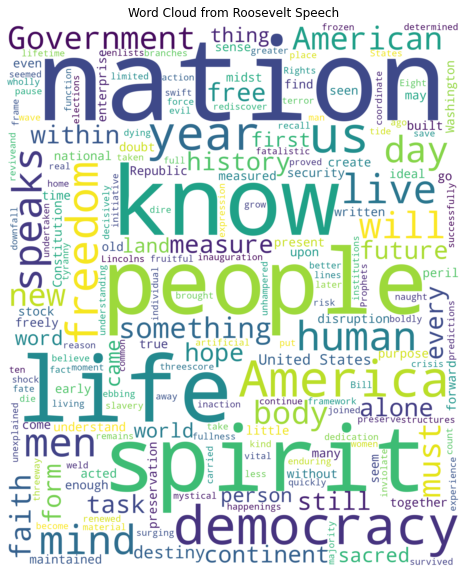

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_roosevelt, interpolation='bilinear')

plt.axis('off')
plt.title('Word Cloud from Roosevelt Speech')
plt.show()

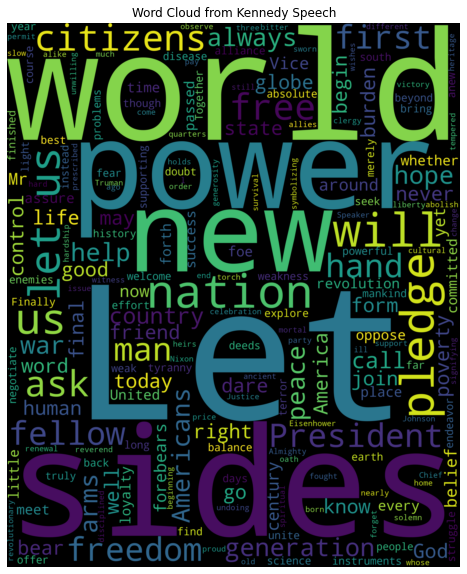

In [67]:
wordcloud_kennedy = WordCloud(background_color='black', height=3000, width=2500).generate(no_punct_kennedy)
wordcloud_kennedy

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_kennedy, interpolation='bilinear')

plt.title('Word Cloud from Kennedy Speech')
plt.axis('off')
plt.show()

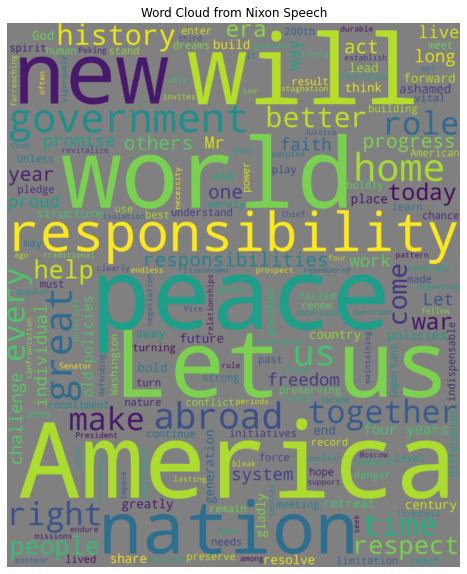

In [68]:
wordcloud_nixon = WordCloud(background_color='grey', height=3000, width=2500).generate(no_punct_nixon)
wordcloud_nixon

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_nixon, interpolation='bilinear')

plt.title('Word Cloud from Nixon Speech')
plt.axis('off')
plt.show()